

---

<div style="color: #d4d4d4; background-color: #1e1e1e; font-family: 'monospace', Consolas, 'Courier New', monospace; font-weight: normal; font-size: 14px; line-height: 19px; white-space: pre;">
<h1 style="text-align: center;"><strong><span style="color: #82c6ff;">New&nbsp;York&nbsp;City&nbsp;Relocation</span></strong></h1>
</div>


---

<br>
<img src="https://i.imgur.com/IcMiyyD.png"
     alt="map 3"
     style="float: left; margin-right: 10px;" />
<br>



#### Python Project
##### BA-505
##### Professor: Dr. Jie Tao
###### Authors: Anthonie Hollaar, Anirudh Vajjah, Bryan Nicholls, Faris Alenezy
# Part 1: The client 
  * Background of our client <br>
    * Our client has a family, with a young child, 5 years of age, and wants to  move to New York,  <br> but has no clue where in New York City he wants to relocate, but he has the following preferences: 
     * Not too much noise near his new house
     * Near a school
     * Near a hospital
     * Near a park
     * Close to the airport
  

# Part 2: Getting the Data
To help our client, we need data about New York City that contains the following information: 

1. Complaints in boroughs in New York City
2. List of public and private K 12 schools in NYC
3. List of hospitals in NYC
4. List of Parks in NYC

# Part 3 : Overview of the Datasets
* We gathered four Datasets to do our analysis
  * [List of complaints made from 311 calls made in NYC over the past 12 months (Nov - 1 - 2018 till Nov - 1 - 2019)](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9 "Open Data NYC")
  * [Schools information](https://capitalplanning.nyc.gov/map/facilities#10/40.7128/-74.0807 "NYC Capital Planning Platform")
  * [ Hospitals](https://capitalplanning.nyc.gov/map/facilities#10/40.7128/-74.0807 "NYC Capital Planning Platform")
  * [Parks ](https://capitalplanning.nyc.gov/map/facilities#10/40.7128/-74.0807 "NYC Capital Planning Platform")


# Part 4 : Cleaning the Datasets
Firstly, we loaded our Datasets containing school information (K-12 - primary and secondary education), <br> available Hospitals and Clinics in each borough, and lastly Parks in each borough located in New York City. <br>
We kept the information necessary and dropped irrelevant features. <br>
We replaced NA's for the closing date by today's date, under the assumption that these problems or service requests still did not get fixed.
We removed the government agencies that 


In [2]:
# Import packages needed for analyses and visualization
import pandas as pd
import calendar
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-pastel')

In [3]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import descartes
from shapely.geometry import Point , Polygon
import folium
from folium import plugins
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import MeasureControl
from folium.plugins import FloatImage
import branca.colormap
from collections import defaultdict
from branca.element import Template, MacroElement
from folium.plugins import HeatMap 

In [103]:
# read in the datasets for schools, hospitals and parks
df_schools = pd.read_csv('NYC_schools.csv' , usecols  = [ 'facname','boro',  'latitude', 'longitude','optype' , 'factype'] )
df_hospitals = pd.read_csv('Hospitals_NYC.csv' , usecols  = [ 'facname','boro',  'latitude', 'longitude','optype' , 'factype'] )
df_parks = pd.read_csv('parks_NYC.csv' , usecols  = [ 'facname','boro',  'latitude', 'longitude','optype'] )

In [104]:
df_parks.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 5 columns):
facname      1114 non-null object
boro         1114 non-null object
latitude     1114 non-null float64
longitude    1114 non-null float64
optype       1114 non-null object
dtypes: float64(2), object(3)
memory usage: 43.6+ KB


# looking at the 311 dataset:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#ccc;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#fff;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#f0f0f0;}
.tg .tg-oe15{background-color:#ffffff;border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-btxf{background-color:#f9f9f9;border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-0pky">Column Name</th>
    <th class="tg-0pky">Description</th>
    <th class="tg-0pky">Data Type :</th>
  </tr>
  <tr>
    <td class="tg-btxf">Unique Key</td>
    <td class="tg-btxf">Unique identifier of a Service Request (SR) in the open data set</td>
    <td class="tg-btxf">int</td>
  </tr>
  <tr>
    <td class="tg-0pky">Created Date</td>
    <td class="tg-0pky">Date SR&nbsp;&nbsp;was created</td>
    <td class="tg-0pky">datetime64</td>
  </tr>
  <tr>
    <td class="tg-btxf">Closed Date</td>
    <td class="tg-btxf">Date SR was closed by responding agency</td>
    <td class="tg-btxf">datetime64</td>
  </tr>
  <tr>
    <td class="tg-0pky">Agency</td>
    <td class="tg-0pky">Acronym of responding City Government Agency</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">Agency Name</td>
    <td class="tg-btxf">Full Agency name of responding City Government Agency</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Complaint Type</td>
    <td class="tg-0pky">This is the fist level of a hierarchy identifying the topic of the incident or condition. <br>Complaint Type may have a corresponding Descriptor (below) or may stand alone.</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">Descriptor</td>
    <td class="tg-btxf">This is  associated to the Complaint Type, and provides further detail on the incident or condition. <br>Descriptor values are dependent on the Complaint Type, and are not always required in SR.</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Status</td>
    <td class="tg-0pky">Status of SR submitted</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">Due Date</td>
    <td class="tg-btxf">Date when responding agency is expected to update the SR.  <br>This is based on the Complaint Type and internal Service Level Agreements (SLAs).</td>
    <td class="tg-btxf">datetime64</td>
  </tr>
  <tr>
    <td class="tg-0pky">Resolution Action Updated Date</td>
    <td class="tg-0pky">Date when responding agency last updated the SR.</td>
    <td class="tg-0pky">datetime64</td>
  </tr>
  <tr>
    <td class="tg-btxf">Resolution Description</td>
    <td class="tg-btxf">Describes the last action taken on the SR by the responding agency.&nbsp;&nbsp;May describe next or future steps.</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Location Type</td>
    <td class="tg-0pky">Describes the type of location used in the address information</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">Incident Zip</td>
    <td class="tg-btxf">Incident location zip code, provided by geo validation.</td>
    <td class="tg-btxf">int</td>
  </tr>
  <tr>
    <td class="tg-0pky">Incident Address</td>
    <td class="tg-0pky">House number of incident address provided by submitter.</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">Street Name</td>
    <td class="tg-btxf">Street name of incident address provided by the submitter</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Cross Street 1</td>
    <td class="tg-0pky">First Cross street based on the geo validated incident location</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">Cross Street 2</td>
    <td class="tg-btxf">Second Cross Street based on the geo validated incident location</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Intersection Street 1</td>
    <td class="tg-0pky">First intersecting street based on geo validated incident location</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">Intersection Street 2</td>
    <td class="tg-btxf">Second intersecting street based on geo validated incident location</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Address Type</td>
    <td class="tg-0pky">Type of incident location information available.</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">City</td>
    <td class="tg-btxf">City of the incident location provided by geovalidation.</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Landmark</td>
    <td class="tg-0pky">If the incident location is identified as a Landmark the name of the landmark will display here</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">Facility Type</td>
    <td class="tg-btxf">If available, this field describes the type of city facility associated to the SR</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Community Board</td>
    <td class="tg-0pky">Provided by geovalidation.</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">BBL</td>
    <td class="tg-btxf">Borough Block and Lot, provided by geovalidation.&nbsp;&nbsp;Parcel number to identify the location of location of buildings and properties in NYC.</td>
    <td class="tg-btxf">int</td>
  </tr>
  <tr>
    <td class="tg-0pky">Borough</td>
    <td class="tg-0pky">Provided by the submitter and confirmed by geovalidation.</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">X Coordinate (State Plane)</td>
    <td class="tg-btxf">Geo validated, X coordinate of the incident location.</td>
    <td class="tg-btxf">float</td>
  </tr>
  <tr>
    <td class="tg-0pky">Y Coordinate (State Plane)</td>
    <td class="tg-0pky">Geo validated,&nbsp;&nbsp;Y coordinate of the incident location.</td>
    <td class="tg-0pky">float</td>
  </tr>
  <tr>
    <td class="tg-btxf">Open_Data_Channel_Type</td>
    <td class="tg-btxf">Indicates how the SR was submitted to 311.  i.e. By Phone, Online, Mobile, Other or Unknown <br>  Phone - submitted by a 311 call center agent on behalf of a customer.  Online - submitted through the 311 mobile app. <br> Other - submitted by another city agency or source.  Unknown - unable to determine the source channel of the SR.  .</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Latitude</td>
    <td class="tg-0pky">Geo based Lat of the incident location</td>
    <td class="tg-0pky">float</td>
  </tr>
  <tr>
    <td class="tg-btxf">Longitude</td>
    <td class="tg-btxf">Geo based Long of the incident location</td>
    <td class="tg-btxf">float</td>
  </tr>
  <tr>
    <td class="tg-0pky">Location</td>
    <td class="tg-0pky">Combination of the geo based lat &amp; long of the incident location</td>
    <td class="tg-0pky">float</td>
  </tr>
  <tr>
    <td class="tg-btxf">Park Facility Name</td>
    <td class="tg-btxf">If the incident location is a Parks Dept facility, the Name of the facility will appear here</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Park Borough</td>
    <td class="tg-0pky">The borough of incident if it is a Parks Dept facility</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">Vehicle Type</td>
    <td class="tg-btxf">If the incident is a taxi, this field describes the type of TLC vehicle.</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Taxi Company Borough</td>
    <td class="tg-0pky">If the incident is identified as a taxi, this field will display the borough of the taxi company.</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">Taxi Pick Up Location</td>
    <td class="tg-btxf">If the incident is identified as a taxi, this field displays the taxi pick up location</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Bridge Highway Name</td>
    <td class="tg-0pky">If the incident is identified as a Bridge/Highway, the name will be displayed here.</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">Bridge Highway Direction</td>
    <td class="tg-btxf">If the incident is identified as a Bridge/Highway, the direction where the issue took place would be displayed here.</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-0pky">Road Ramp</td>
    <td class="tg-0pky">If the incident location was Bridge/Highway this column differentiates if the issue was on the Road or the Ramp.</td>
    <td class="tg-0pky">string</td>
  </tr>
  <tr>
    <td class="tg-btxf">Bridge Highway Segment</td>
    <td class="tg-btxf">Additional information on the section of the Bridge/Highway were the incident took place.</td>
    <td class="tg-btxf">string</td>
  </tr>
  <tr>
    <td class="tg-oe15" colspan="3"><a href="https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9">source</a></td>
  </tr>
</table>

#### We took a sample of 15 %  the dataset that has 2.4 Million records

In [7]:
# read in the whole file of the past 12 months (Nov 2018- Nov 2019) of 311 calls made to government agencies in New York City about complaints, service requests and problems
data=pd.read_csv('311_Service_Requests_from_2010_to_Present.tsv',delimiter='\t',encoding='utf-8-sig',low_memory=False, index_col  = 'Unique Key')

#we will use sample() function to select a random sample of size equivalent to 15% of the size of the dataset
df1 = data.sample(frac =.15, replace=True)

# make a copy of our sample of the 311 calls dataset
df2 = df1.copy()

# save the sample to a .csv file
df2.to_csv(r'C:\Users\faris\311_sample.csv')
data.shape

C:\Users\faris\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2549035, 40)

In [8]:
# read in the csv file created earlier and only take the features (columns) needed
df_311 = pd.read_csv('311_sample.csv'  , low_memory=False ,  usecols  = ['Created Date', 'Closed Date', 'Agency', 'Agency Name', 'City' , 
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 
       'Resolution Description', 'Borough', 'Open Data Channel Type' , "Longitude" , "Latitude"]  )
# keeping all these series and dropping  the rest becuase they have dupliucte values or unuseble for our analysis
 

In [9]:
# infer the number of rows and columns in the dataframe 311
df_311.shape

(382343, 14)

In [13]:
# source: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
# a function that provides a summary of the  missing values in a dataset
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isna().sum()
        mis_val_percent = 100 * df.isna().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df_311)

Your selected dataframe has 14 columns and 378063 Rows.
There are 6 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Location Type,0,87744,23.2,87744,23.2,object
Resolution Description,0,30639,8.1,30639,8.1,object
Latitude,0,19023,5.0,19023,5.0,float64
Longitude,0,19023,5.0,19023,5.0,float64
Incident Zip,0,10760,2.8,10760,2.8,object
Descriptor,0,6047,1.6,6047,1.6,object


### We see that the Closed Date has missing values so we fill it using todays date and assume that the complaints didn't get addressed


In [14]:
# getting todays date with timestap
TODAY =datetime.datetime.today()

# filling the missing data for Closed Date (NaN's) by Today's date (4.3% of our data is replaced)
df_311['Closed Date'].fillna(TODAY, inplace=True) 

# the agencies (DVS, TAX, DCAS, ACS, COIB) have some missing data or unclear information and are taken out of our sample
df_311 = df_311[df_311['Agency']!='DVS']  # 1 row of data with complaint type: 'file:///c:/windows/win.ini'
df_311 = df_311[df_311['Agency']!='TAX']  # 24 rows of complaint type: 'Question'
df_311 = df_311[df_311['Agency']!='DCAS'] # 92 rows of complaint type: 'Question'
df_311 = df_311[df_311['Agency']!='ACS']  # 36 rows of complaint type: 'Forms'
df_311 = df_311[df_311['Agency']!='COIB'] # 2 rows of complaint type: 'Forms'

# if the borough wasn't specified it was dropped from our dataset because not usefull information and no longitude and lattitude
df_311 = df_311[df_311['Borough']!='Unspecified'] # 3761 rows dropped (<1% of sample dataset)

# filling the missing city with the mode
df_311['City'].fillna(df_311['City'].mode()[0], inplace=True) 

# infer the new number of rows
df_311.shape

(378063, 14)

### Since our data is time based, for us to do the analysis we first need to add new date columns

In [72]:
# adding the new dates column
# df_311['just_time_open'] = pd.to_datetime(df_311['Created Date']).dt.strftime('%H:%M:%S')
df_311['Closed Date'] = pd.to_datetime(df_311['Closed Date']) # change to datetime
df_311['Created Date'] = pd.to_datetime(df_311['Created Date']) # change to datetime
df_311['day of the week created date'] =  df_311['Created Date'].dt.day_name() # add new column for the day of the week of created date
df_311['day of the week close date'] =  df_311['Closed Date'].dt.day_name() # add new column for the day of the week of closed date
df_311['Days to Close a Complaint' ] = -(df_311["Created Date"] - df_311["Closed Date"]).astype("timedelta64[D]") # add new column for the reponse time to a given complaint
df_311['Month complaint open number'] = df_311['Created Date'].dt.month # add column for which month the complaint type was opened

# source: https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
df_311['Month complaint open'] = df_311['Month complaint open number'].apply(lambda x: calendar.month_abbr[x]) # add new column which converts the month complaint opened to a month name 
df_311['Month complaint open number'] = df_311['Month complaint open number'].astype(int) # change column to integer for month complaint opened
df_311['hours to Close a Complaint' ] = -(df_311["Created Date"] - df_311["Closed Date"]).astype("timedelta64[h]") # number of hours it takes to close a given complaint

# Goal: part of day for calling and making a 311 request
## subset the column created date to a new name
df_311_open = df_311['Created Date']
## we divided the time of day to bins  to see when will most complaints happen
df_311_open_cut=pd.cut(df_311_open.dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)
## add a new column for the part of day to the dataframe df_311
df_311['Part of day open'] =  df_311_open_cut

# source: https://www.visittheusa.com/info/weather-seasons
# Summer: June - August
# Fall: September - November
# Winter: December - February
# Spring: March - May 

# source: https://stackoverflow.com/questions/50857232/how-to-pick-a-season-month-over-several-years-from-a-pandas-dataframe
# we returns the remainder of the month  + add 3 and then floor division down to the nearest whole number
# use the map method to map each season

seasons = ((df_311['Month complaint open number'] % 12 + 3) // 3).map({1:'winter', 2: 'Spring', 3:'summer', 4:'Fall'})
# returning dataframe with salary between above values 
df_311["season"]= seasons

# df.dtypes
df_311.head(2)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,...,Latitude,Longitude,day of the week created date,day of the week close date,Days to Close a Complaint,Month complaint open number,Month complaint open,hours to Close a Complaint,Part of day open,season
0,2018-11-16 22:38:00,2018-11-20 02:07:00,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10451,BRONX,The Department of Housing Preservation and Dev...,...,40.829304,-73.921346,Friday,Tuesday,4.0,11,Nov,76.0,Evening,Fall
1,2019-07-22 02:28:00,2019-07-22 21:10:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10451,BRONX,The Police Department responded to the complai...,...,40.823165,-73.917610,Monday,Monday,1.0,7,Jul,19.0,Night,summer


# Part 5 : Data Exploration 
### ploting the dataframe to do the initial data analysis

Text(0.5, 0, ' % of top 25 complaints type')
               
Top 25 complaints


,Complaint Type,Rank
Noise - Residential,9.179687,1
HEAT/HOT WATER,8.244922,2
Illegal Parking,7.682053,3
Blocked Driveway,5.413119,4
Request Large Bulky Item Collection,5.112640,5
Noise - Street/Sidewalk,3.830843,6
Street Condition,3.535125,7
Street Light Condition,2.721504,8
Water System,2.623372,9
UNSANITARY CONDITION,2.618347,10


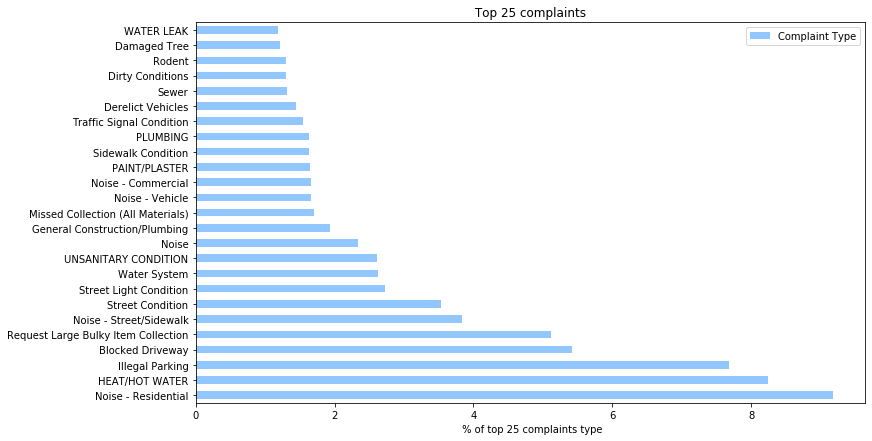

In [80]:
#(df_311['Complaint Type'].value_counts()/len(df_311['Complaint Type'])*100).head(10).plot(kind= 'barh' , title= ' Top 10 complaints ' ).set_xlabel(' % of top 10 complaints type')

#defining the array
array_complaints_1 =(df_311['Complaint Type'].value_counts()/len(df_311['Complaint Type'])*100).head(25)

# setting key : value to the Dataframe
complaints_type_keys = {'Complaint Type':array_complaints_1 }

# Adding the arrays to the DF
df_complaints_type = pd.DataFrame(data=array_complaints_1)

#ploting the DF
complaints_type_plt = df_complaints_type.plot(kind= 'barh' , figsize = (12,7) ,
                                               title= ' Top 25 complaints ' ).set_xlabel(' % of top 25 complaints type')
df_complaints_type['Rank'] = df_complaints_type['Complaint Type'].rank(ascending = False).astype(int)
print(complaints_type_plt)
print("               ")
print("Top 25 complaints")
df_complaints_type

* Noise reported highest number of complaints with 9.2% of total percentage of complaints
* Followed by Heat and Illegal parking with 8.2% and 7.7%

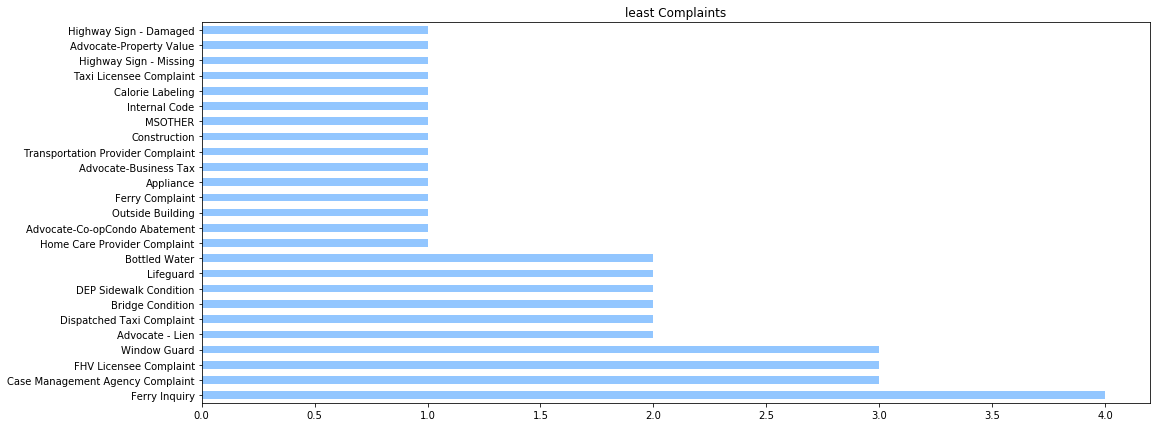

In [ ]:
df_Brooklyn['Complaint Type'].value_counts().tail(25).plot(kind='barh' ,
                    figsize=(17,7), title = 'least Complaints')

* Least complaints are reported for highway sign - damaged/missing, advocate - property value/business tax, appliance, ferry complaint with less than or equal to 1% of the total number of complaints.

## looking at the description for  Noise - Residential , HEAT/HOT WATER	 and Illegal Parking since they have the highest percentage 

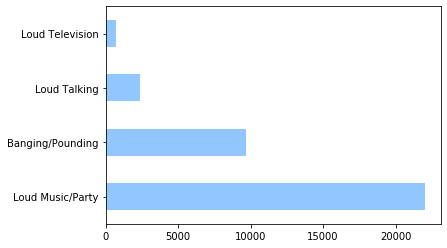

In [ ]:
#subsetting  noise
noise = df_311[df_311['Complaint Type']=='Noise - Residential']
noise['Descriptor'].value_counts().plot.barh()

* Loud Music or party in the residential areas is the primary factor for the Noise complaints, followed by banging, loud talking and loud television coming from the residential neighbours.

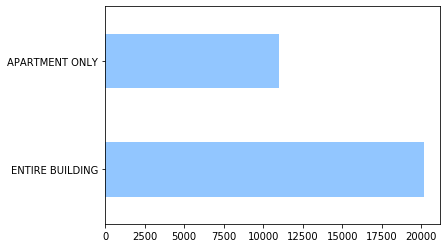

In [ ]:
#subsetting  hot/water
water_hot = df_311[df_311['Complaint Type']=='HEAT/HOT WATER']
water_hot['Descriptor'].value_counts().plot.barh()

* Majority of heat complaints are registered for the entire buidling than single apartment.



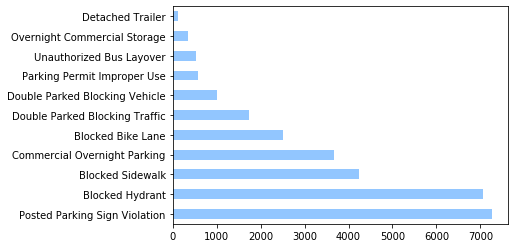

In [84]:
#subsetting parking
ill_Parking = df_311[df_311['Complaint Type']=='Illegal Parking']
ill_Parking['Descriptor'].value_counts().plot.barh()

* Major type of parking violations are parking sign violations, blocked hydrant, blocked sidewalk, commercial overnight parking and blocked bike lane.

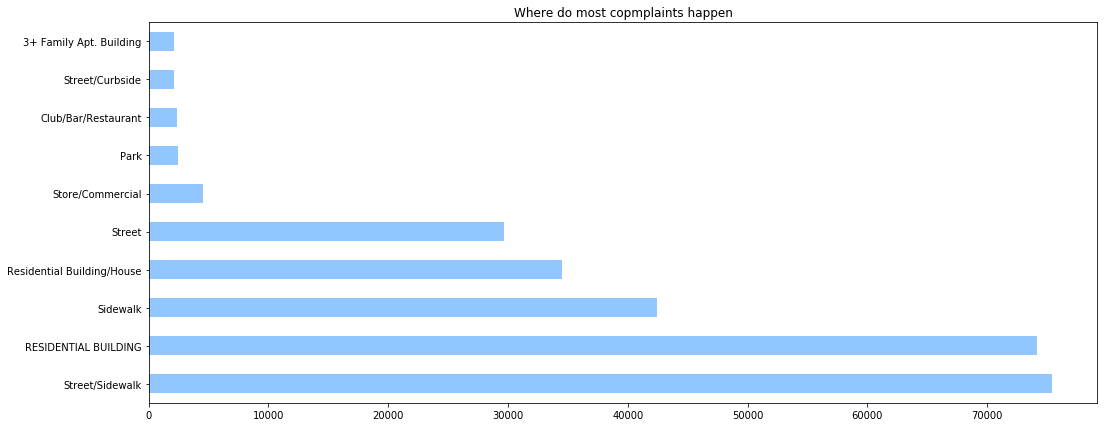

In [ ]:
df_311['Location Type' ].value_counts().head(10).plot(kind='barh',
                    figsize=(17,7), title = 'Where do most copmplaints happen')

* Majority of the complaints happen at street/sidewalk followed by residential buildings.
* Least complaints happen at a 3+ family apartments, clubs and parks.

               
NYC busiest Agencies:


,Agency,Rank
NYPD,32.885789,1
HPD,19.879755,2
DSNY,12.943610,3
DOT,10.909293,4
DEP,7.369407,5
DOB,5.186437,6
DPR,4.099052,7
DOHMH,2.590838,8
TLC,1.376226,9
DOF,1.057760,10


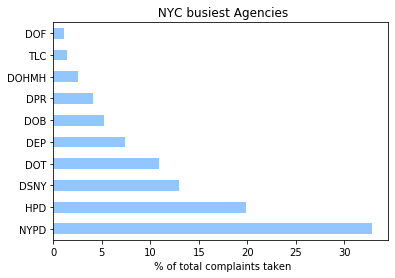

In [85]:

#defing the array
array_agency_1 =(df_311['Agency'].value_counts()/len(df_311['Agency'])*100).head(10)


# setting key : value to the Dataframe

agency_1_keys = {'Agency':array_agency_1 }

# Adding the arrays to the DF

df_agency = pd.DataFrame(data=agency_1_keys)
df_agency['Rank'] = df_agency['Agency'].rank(ascending = False).astype(int)

#ploting the DF
df_agency_plt = df_agency['Agency'].plot(kind= 'barh', title= ' NYC busiest Agencies').set_xlabel(' % of total complaints taken')
print("               ")
print("NYC busiest Agencies:")
df_agency

* Majority of complaints are transfered or reported at NYPD with 32.8%
* More than 80% of complaints are taken or reported at top 5 agencies (NYPD, HPD, DSNY, DOT ad DEP)

Text(0, 0.5, '% of total Complaints in Each Borough ')
               
which Borough has the most complaints


,Borough,Rank
BROOKLYN,31.89,1
QUEENS,24.99,2
MANHATTAN,19.74,3
BRONX,17.97,4
STATEN ISLAND,5.41,5


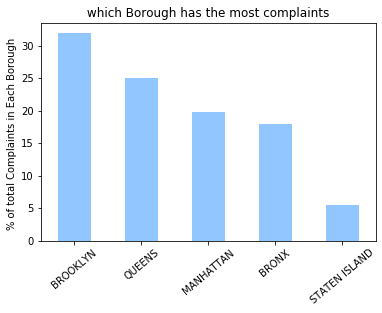

In [87]:
array_boro_1 =(df_311['Borough'].value_counts()/len(df_311['Borough'])*100).round(2)


boro_complaints_keys = {'Borough':array_boro_1 }
# Adding the arrays to the DF


df_boro_complaints = pd.DataFrame(data=boro_complaints_keys)

df_boro_complaints['Rank'] = df_boro_complaints['Borough'].rank(ascending = False).astype(int)

boro_complaints_plt = df_boro_complaints["Borough"].plot(kind= 'bar' ,rot = 40 , 
                                              title= ' which Borough has the most complaints ' ).set_ylabel('% of total Complaints in Each Borough ')
print(boro_complaints_plt)
print("               ")
print("which Borough has the most complaints")
df_boro_complaints


* The above chart shows us the most number of complaints by top 5 boroughs.
* Brooklyn reported highest number of complaints and Staten Island has the least number of complaints.

               
What day of the week do complaints get opened:


,day of the week complaint created date
Monday,15.309882
Tuesday,15.177100
Thursday,15.156204
Wednesday,14.998029
Friday,14.767380
Saturday,12.551347
Sunday,12.040057


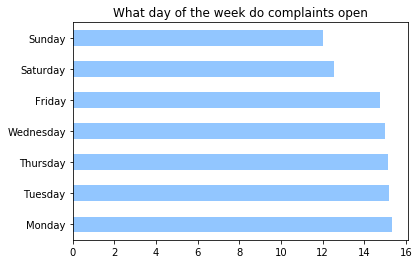

In [ ]:
# what day in the week do people make a complaint
#df_311['day of the week created date'].value_counts().plot.barh(title= 'What day of the week do complaints open')


#defing the array
array_day_of_week_1 =(df_311['day of the week created date'].value_counts()/len(df_311['day of the week created date'])*100).head(10)


# setting key : value to the Dataframe

day_of_week_keys = {'day of the week complaint created date':array_day_of_week_1 }

# Adding the arrays to the DF

df_day_of_week = pd.DataFrame(data=day_of_week_keys)

#ploting the DF
df_day_of_week_plt = df_day_of_week.plot.barh(title= 'What day of the week do complaints open' , legend = False)
print("               ")
print("What day of the week do complaints get opened:")
df_day_of_week

* The above chart shows us on what day most number of complaints are received/opened. 
* On weekends Saturday and Sunday least number of complaints are opened, while on weekdays highest number of complaints are opened. 

,Days to Close a Complaint,count of closed complaint,Rank
Agency,,,
TLC,94.90,5203,1
DOHMH,77.15,9795,2
DPR,72.63,15497,3
EDC,71.28,334,4
DOE,48.68,220,5
DCA,25.19,2182,6
DOB,24.56,19608,7
DOITT,19.93,75,8
DOT,14.67,41244,9


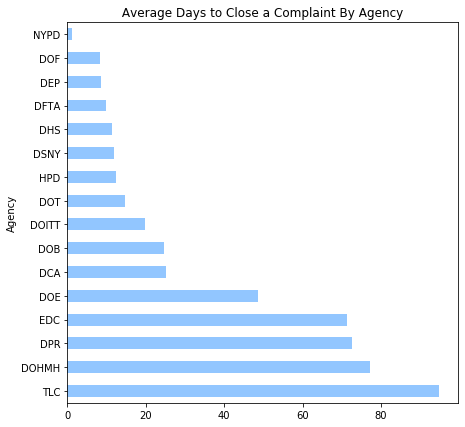

In [90]:

df_311_agg = df_311.groupby(['Agency'] ).agg({'Days to Close a Complaint':   'mean'  } ).round(2)
df_311_agg.reset_index()
df_311_agg['count of closed complaint'] = df_311.groupby('Agency' )['Days to Close a Complaint'].count()
df_311_agg = df_311_agg.sort_values(by = "Days to Close a Complaint" , ascending = False)
df_311_agg['Rank'] = df_311_agg['Days to Close a Complaint'].rank(ascending = False).astype(int)
df_311_agg['Days to Close a Complaint' ].plot.barh(title = ' Average Days to Close a Complaint By Agency ' ,figsize = (7,7))
df_311_agg

* The above chart shows average time taken by each agency to close a complaint.
* NYPD closes a complaints in less than 2days from the receipt of a complaint. 
* TLC takes more than 3months or 90days to close a complaint.

# comment here

### we subset each borough to better understand the dataset

In [95]:
data_BROOKLYN = df_311[df_311['Borough']=='BROOKLYN']
data_QUEENS = df_311[df_311['Borough']=='QUEENS']
data_MANHATTAN = df_311[df_311['Borough']=='MANHATTAN']
data_BRONX =df_311[df_311['Borough']=='BRONX']
data_STATEN_ISLAND = df_311[df_311['Borough']=='STATEN ISLAND']

In [22]:
(data_BROOKLYN['Complaint Type'].value_counts()/
           len(data_BROOKLYN['Complaint Type'])*100).round(2).head()

Illegal Parking                        8.52
Noise - Residential                    8.28
HEAT/HOT WATER                         7.97
Blocked Driveway                       6.18
Request Large Bulky Item Collection    5.97
Name: Complaint Type, dtype: float64

% of top 10 complaints for Each Borough 


,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN_ISLAND
Illegal Parking,8.52,9.7,6.41,4.94,7.16
Noise - Residential,8.28,7.94,10.04,12.59,5.74
HEAT/HOT WATER,7.97,4.31,9.24,15.1,No top 10
Blocked Driveway,6.18,8.78,No top 10,5.3,2.99
Request Large Bulky Item Collection,5.97,7.63,2.83,No top 10,8.45
Noise - Street/Sidewalk,3.33,No top 10,7.01,5.41,No top 10
Street Condition,2.94,4.7,2.97,No top 10,7.58
UNSANITARY CONDITION,2.71,No top 10,2.43,4.69,No top 10
General Construction/Plumbing,2.42,No top 10,No top 10,No top 10,No top 10
Street Light Condition,2.31,3.11,No top 10,3.38,3.25


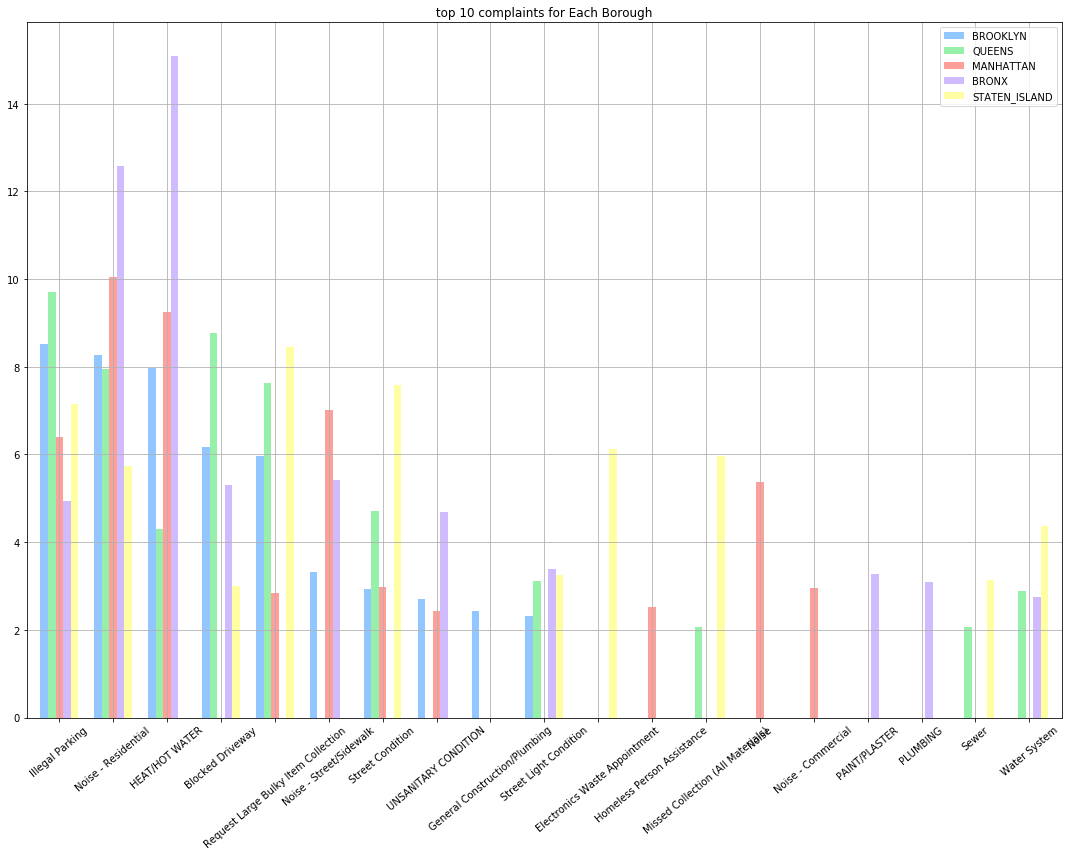

In [ ]:
#defing the arrays to add them to the dataframe
# each array has the % of each channel type of the complaints
array_1 = (data_BROOKLYN['Complaint Type'].value_counts()/
           len(data_BROOKLYN['Complaint Type'])*100).round(2).head(10)

array_2 = (data_QUEENS['Complaint Type'].value_counts()/
           len(data_QUEENS['Complaint Type'])*100).round(2).head(10)

array_3 = (data_MANHATTAN['Complaint Type'].value_counts()/
           len(data_MANHATTAN['Complaint Type'])*100).round(2).head(10)

array_4 = (data_BRONX['Complaint Type'].value_counts()/
           len(data_BRONX['Complaint Type'])*100).round(2).head(10)

array_5 =  (data_STATEN_ISLAND['Complaint Type'].value_counts()/
            len(data_STATEN_ISLAND['Complaint Type'])*100).round(2).head(10)



#used the coding assignment part 3 to figure out the table

boro_complaint_keys = {'BROOKLYN':array_1 , 'QUEENS': array_2 , 'MANHATTAN' : array_3
                          , "BRONX":  array_4 , "STATEN_ISLAND" :array_5 }
# Adding the arrays to the DF
df_boro_complaint = pd.DataFrame(data=boro_complaint_keys)

#sorting the valuse
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html
df_boro_complaint.sort_values("BROOKLYN", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 

#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

#ploting the dataframe
df_boro_complaint_plt = df_boro_complaint.plot(kind='bar'  ,rot = 40 , figsize = (15,12),width=.7 , grid = True ,
                                                     title = " top 10 complaints for Each Borough " 
                                                     , table =False)
plt.tight_layout()


print("% of top 10 complaints for Each Borough ")


df_boro_complaint.fillna("No top 10", inplace=True)   
df_boro_complaint


* The above chart explains top 10 complaints received in Brooklyn, Bronx, Manhattan, Queens and Staten Island.

AxesSubplot(0.0704282,0.0965278;0.904572x0.810417)
            
% of the channel type of complaints


,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN_ISLAND
PHONE,48.22,49.02,39.44,51.58,54.59
ONLINE,20.64,19.41,28.41,21.13,17.49
UNKNOWN,15.43,17.64,15.56,13.50,19.57
MOBILE,15.32,13.32,16.09,13.56,7.47
OTHER,0.39,0.62,0.51,0.24,0.87


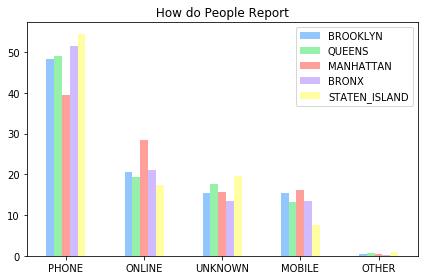

In [91]:
#defing the arrays to add them to the dataframe
# each array has the % of each channel type of the complaints
array_1 = (data_BROOKLYN['Open Data Channel Type'].value_counts()/
           len(data_BROOKLYN['Open Data Channel Type'])*100).round(2)

array_2 = (data_QUEENS['Open Data Channel Type'].value_counts()/
           len(data_QUEENS['Open Data Channel Type'])*100).round(2)

array_3 = (data_MANHATTAN['Open Data Channel Type'].value_counts()/
           len(data_MANHATTAN['Open Data Channel Type'])*100).round(2)

array_4 = (data_BRONX['Open Data Channel Type'].value_counts()/
           len(data_BRONX['Open Data Channel Type'])*100).round(2)

array_5 =  (data_STATEN_ISLAND['Open Data Channel Type'].value_counts()/
            len(data_STATEN_ISLAND['Open Data Channel Type'])*100).round(2)



#used the coding assignment part 3 to figure out the table

boro_channel_type_keys = {'BROOKLYN':array_1 , 'QUEENS': array_2 , 'MANHATTAN' : array_3
                          , "BRONX":  array_4 , "STATEN_ISLAND" :array_5 }
# Adding the arrays to the DF
df_boro_channel_type = pd.DataFrame(data=boro_channel_type_keys)

#sorting the valuse
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html
df_boro_channel_type.sort_values("BROOKLYN", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 

#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

#ploting the dataframe
df_boro_channel_type_plt = df_boro_channel_type.plot(kind='bar'  ,rot = 0 , 
                                                     title = " How do People Report " 
                                                     , table =False)
plt.tight_layout()

print(df_boro_channel_type_plt)
print("            ")
print("% of the channel type of complaints")


  
df_boro_channel_type

* Majority of complaints are received by phone (Call center) followed by online or internet in Brooklyn, Queens, Manhattan, Nronx and Staten Island boroughs.

                  
% of the part of the day copmplints occur


,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN_ISLAN
Morning,34.66,33.89,31.14,32.42,40.84
Afternoon,31.89,34.16,30.85,29.86,35.05
Evening,21.68,21.41,24.30,23.83,16.86
Night,11.77,10.54,13.71,13.88,7.25


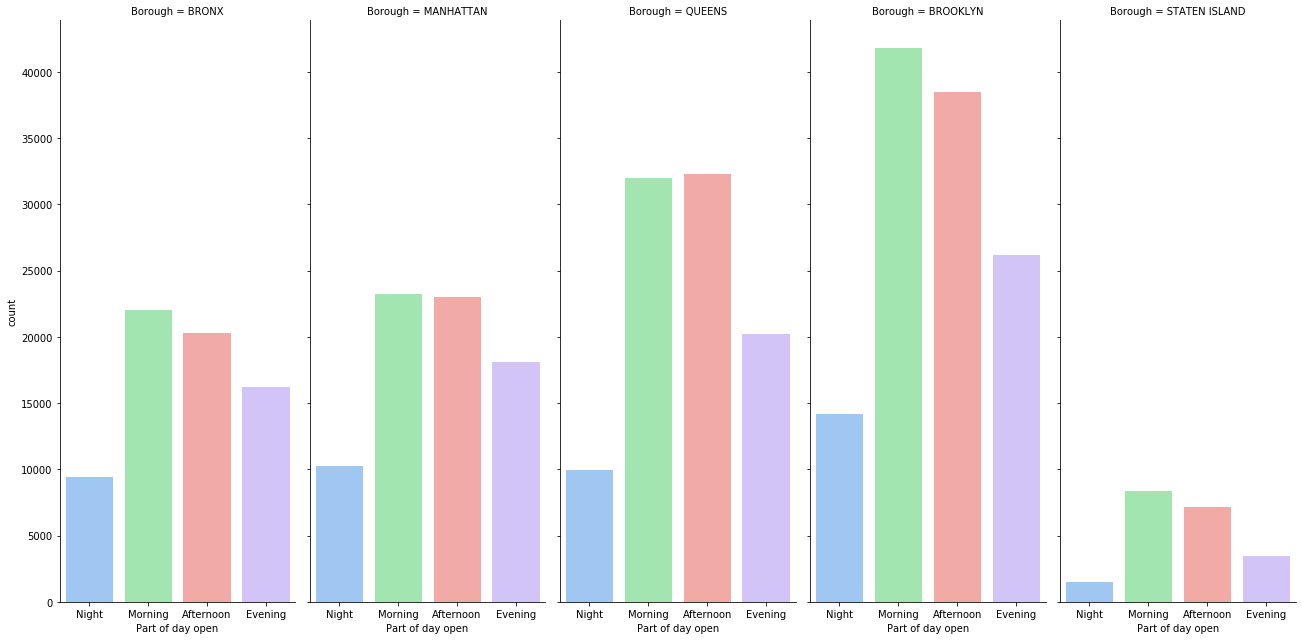

In [ ]:
#ploting the dataframe using the df_311 to get the needed information
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
sns.catplot(x="Part of day open", col='Borough',data=df_311, kind="count" , height=9, aspect=.4)


array_1 = (data_BROOKLYN['Part of day open'].value_counts()/
           len(data_BROOKLYN['Part of day open'])*100).round(2)

array_2 = (data_QUEENS['Part of day open'].value_counts()/
           len(data_QUEENS['Part of day open'])*100).round(2)

array_3 = (data_MANHATTAN['Part of day open'].value_counts()/
           len(data_MANHATTAN['Part of day open'])*100).round(2)

array_4 = (data_BRONX['Part of day open'].value_counts()/
           len(data_BRONX['Part of day open'])*100).round(2)

array_5 =  (data_STATEN_ISLAND['Part of day open'].value_counts()/
            len(data_STATEN_ISLAND['Part of day open'])*100).round(2)



#used the coding assignment part 3 to figure out the table

boro_part_of_day_keys = {'BROOKLYN':array_1 , 'QUEENS': array_2 , 'MANHATTAN' : array_3
                          , "BRONX":  array_4 , "STATEN_ISLAN" :array_5 }
# Adding the arrays to the DF
df_boro_part_of_day = pd.DataFrame(data=boro_part_of_day_keys)

#sorting the valuse
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html
df_boro_part_of_day.sort_values("BROOKLYN", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 








print("                  ")
print("% of the part of the day copmplints occur")


  
df_boro_part_of_day

* The above chart shows at what time in a day highest number of complaints are reported. 
* The majority number of complaints are reported in Morning part of the day follwed by Afternoon.
* Least number of complaints are reported during night time.

                  
% of the complaint distribution in the past 12 months


,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN_ISLAN
Jun,9.74,9.72,9.26,9.04,10.74
May,9.71,9.98,9.28,9.01,10.35
Jan,9.42,8.42,8.98,10.93,9.47
Apr,8.97,9.02,8.53,8.18,8.83
Nov,8.97,8.61,9.13,9.31,8.33
Mar,8.86,8.84,8.32,8.57,9.62
Dec,8.46,8.14,8.15,8.62,8.61
Feb,7.87,7.54,7.90,8.74,8.22
Sep,7.36,7.52,7.79,6.31,6.51
Aug,7.14,7.50,7.30,6.94,6.83


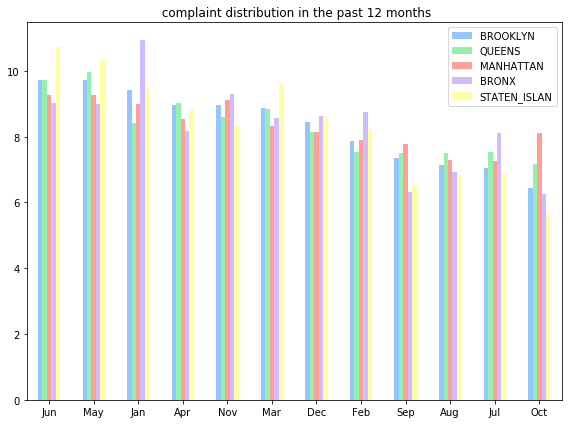

In [94]:


array_1 = (data_BROOKLYN['Month complaint open'].value_counts()/
           len(data_BROOKLYN['Month complaint open'])*100).round(2)

array_2 = (data_QUEENS['Month complaint open'].value_counts()/
           len(data_QUEENS['Month complaint open'])*100).round(2)

array_3 = (data_MANHATTAN['Month complaint open'].value_counts()/
           len(data_MANHATTAN['Month complaint open'])*100).round(2)

array_4 = (data_BRONX['Month complaint open'].value_counts()/
           len(data_BRONX['Month complaint open'])*100).round(2)

array_5 =  (data_STATEN_ISLAND['Month complaint open'].value_counts()/
            len(data_STATEN_ISLAND['Month complaint open'])*100).round(2)



#used the coding assignment part 3 to figure out the table

boro_months_keys = {'BROOKLYN':array_1 , 'QUEENS': array_2 , 'MANHATTAN' : array_3
                          , "BRONX":  array_4 , "STATEN_ISLAN" :array_5 }
# Adding the arrays to the DF
df_months = pd.DataFrame(data=boro_months_keys)


#sorting the valuse
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html
df_months.sort_values("BROOKLYN", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 

#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

#ploting the dataframe but using the df_311 to get the needed information
df_months_plt = df_months.plot(kind='bar'  ,rot = 0 , figsize = (8,6) , 
                                                     title = " complaint distribution in the past 12 months" 
                                                     , table =False)

plt.tight_layout()

#print(df_season_plt)
print("                  ")
print("% of the complaint distribution in the past 12 months")
df_months


* The above chart explains complaints distribution in the past 12 months. In the month of June highest number of complaints reported in all the 5 boroughs together. In the month of October least number of compalints reported in all the 5 boroughs together.

#  Taking a close look at NYPD 311 request:

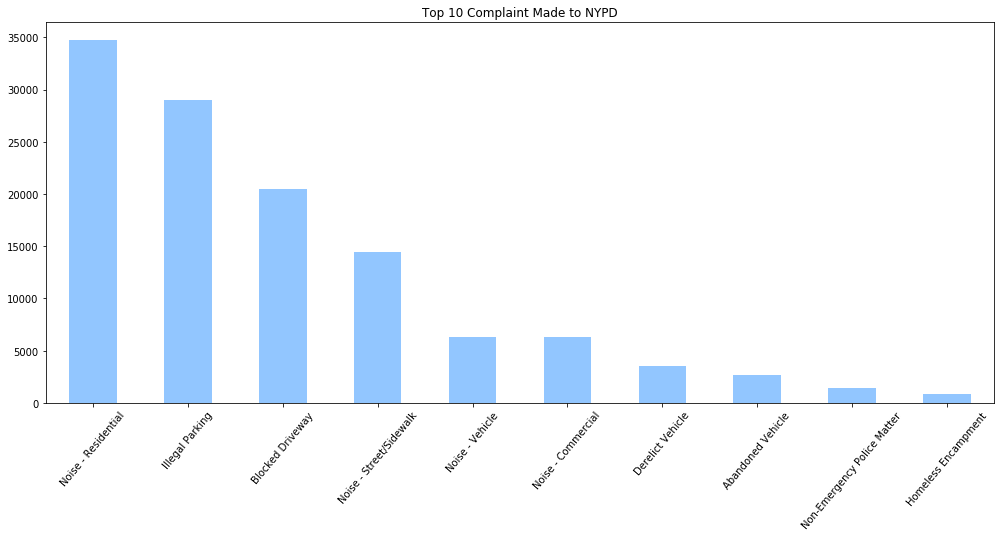

In [65]:
df_311_NYPD=  df_311[df_311['Agency']=='NYPD']
# ploting 
df_311_NYPD['Complaint Type'].value_counts().head(10).plot(kind='bar',
                    figsize=(17,7), rot = 50, title = 'Top 10 Complaint Made to NYPD')

C:\Users\faris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,Average hours to Close a Complaint,Count of Closeed Complaint NYPD
Complaint Type,,
Bike/Roller/Skate Chronic,3.653061,98
Panhandling,3.725352,142
Vending,4.951153,737
Disorderly Youth,5.000000,19
Traffic,5.621918,730
Posting Advertisement,5.800000,10
Animal Abuse,6.207880,736
Urinating in Public,8.000000,92
Noise - Vehicle,8.160114,6308


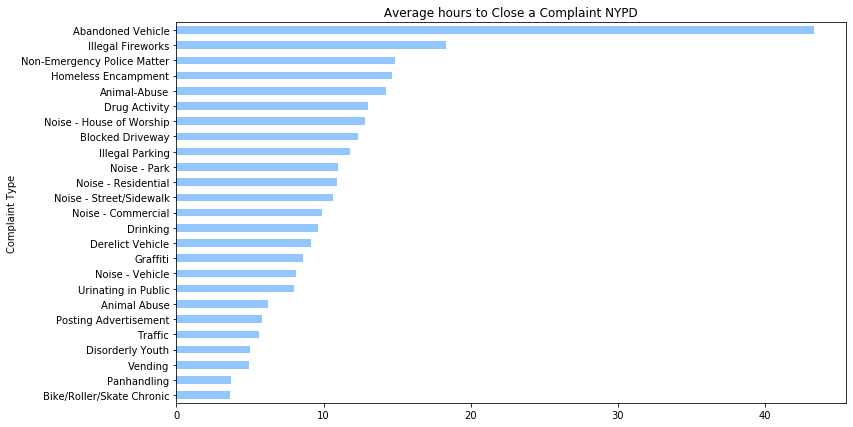

In [66]:

df_311_NYPD_agg = df_311_NYPD['hours to Close a Complaint' ].groupby(df_311_NYPD['Complaint Type' ]).agg({'Average hours to Close a Complaint': 'mean'})
df_311_NYPD_agg['Count of Closeed Complaint NYPD' ] = df_311_NYPD['hours to Close a Complaint' ].groupby(df_311_NYPD['Complaint Type' ]).count()
df_311_NYPD_agg = df_311_NYPD_agg.sort_values(by = "Average hours to Close a Complaint" , ascending = True)

df_311_NYPD_agg['Average hours to Close a Complaint' ].plot.barh(title = ' Average hours to Close a Complaint NYPD ' , figsize =(12,7))
df_311_NYPD_agg

# Digging deeper into the complaints using the complaint description to see when a specific complaint is addressed

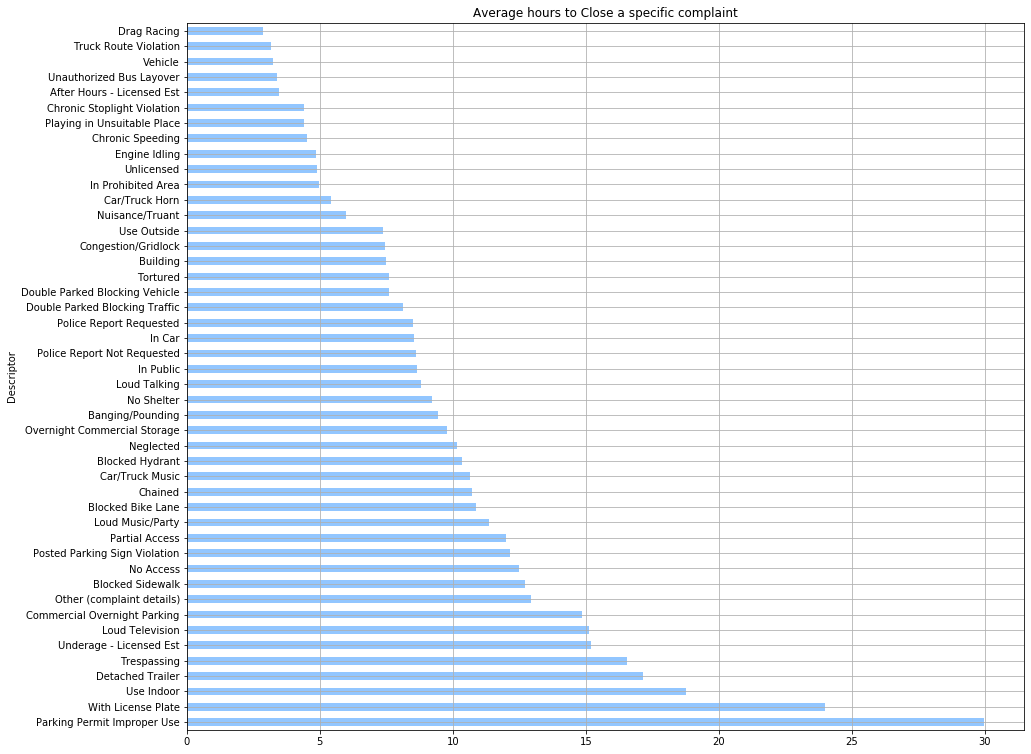

In [70]:
df_311_NYPD['hours to Close a Complaint' ].groupby(df_311_NYPD['Descriptor' ]).agg(np.mean).sort_values(ascending=False).plot(kind = "barh" , figsize = (15,13) , grid = True , title = "Average hours to Close a specific complaint")



# comment here

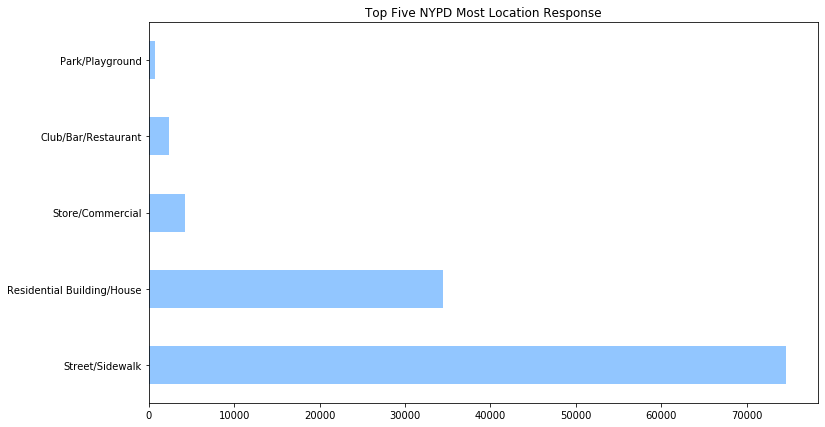

In [71]:
df_311_NYCPD['Location Type' ].value_counts().head(5).plot(kind='barh',
                    figsize=(12,7), title = 'Top Five NYPD Most Location Response')

# Comment here

# Part 6 : Based on the client wants and needs like friend who live in Queens or  close to the  airport: <br>
### We looked at listing in queens and our team decided on this listing but first lets take a closer look to Queens

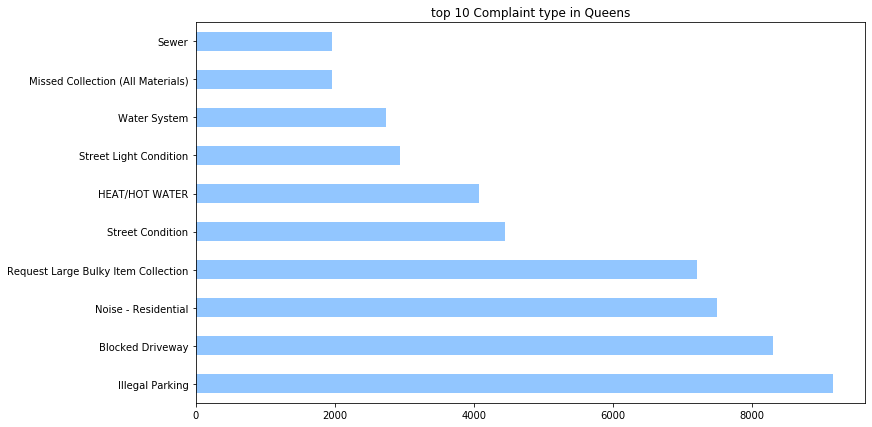

In [ ]:
data_QUEENS['Complaint Type'].value_counts().head(10).plot(kind='barh', 
                    figsize=(12,7), title = 'top 10 Complaint type in Queens')

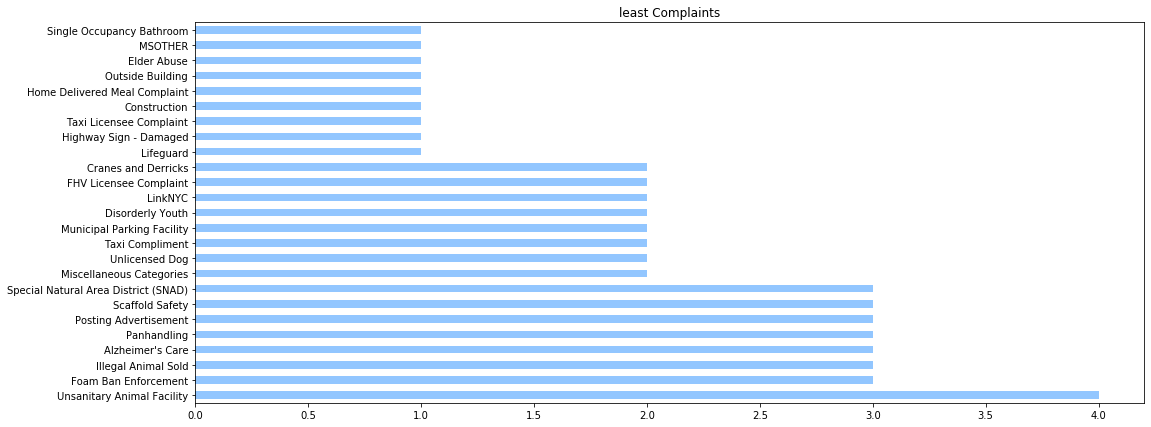

In [ ]:
data_QUEENS['Complaint Type'].value_counts().tail(25).plot(kind='barh' ,
                    figsize=(17,7), title = 'least Complaints')

In [ ]:
data_QUEENS['Descriptor'].value_counts().head(10)

Request Large Bulky Item Collection    7208
Loud Music/Party                       7040
No Access                              5656
With License Plate                     3082
Pothole                                2737
Partial Access                         2643
Blocked Hydrant                        2515
ENTIRE BUILDING                        2345
Posted Parking Sign Violation          2165
Street Light Out                       2071
Name: Descriptor, dtype: int64

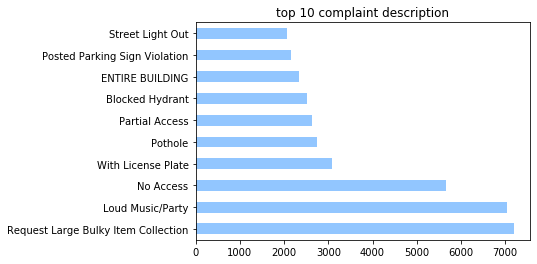

In [ ]:
data_QUEENS['Descriptor'].value_counts().head(10).plot.barh(title =  "top 10 complaint description")

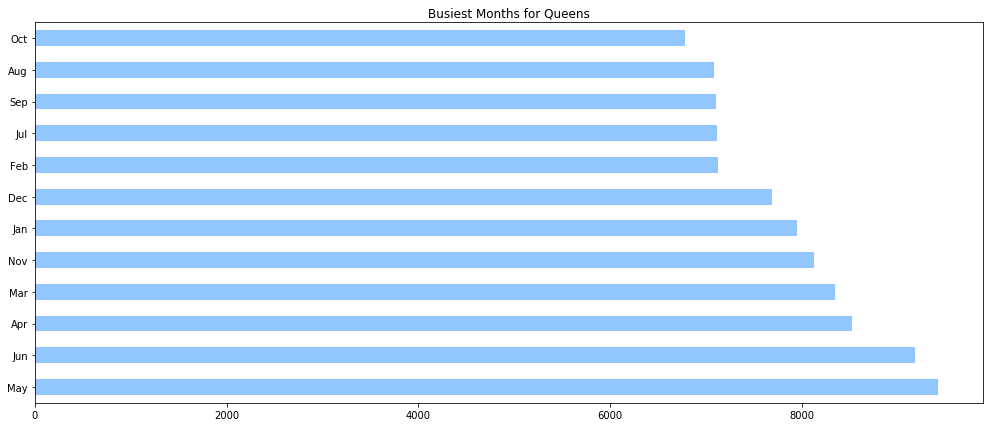

In [ ]:
data_QUEENS['Month complaint open'].value_counts().plot(kind='barh',
                    figsize=(17,7), title = 'Busiest Months for Queens')


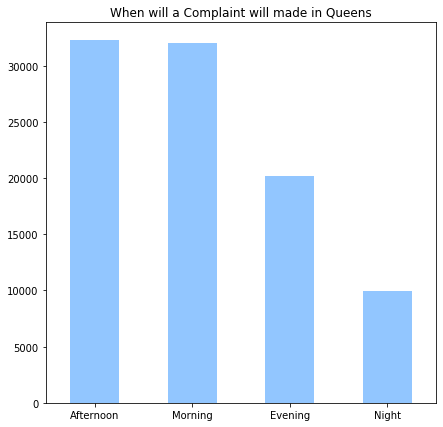

In [ ]:
data_QUEENS['Part of day open'].value_counts().head(25).plot(kind='bar', rot = 0 ,
                    figsize=(7,7), title = 'When will a Complaint will made in Queens')

## looking at the description for  Noise - Residential , Blocked Driveway and Illegal Parking since they have the highest percentage 

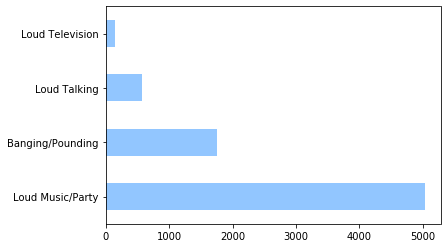

In [ ]:
noise_data_QUEENS = data_QUEENS[data_QUEENS['Complaint Type']=='Noise - Residential']
noise_data_QUEENS['Descriptor'].value_counts().plot.barh()

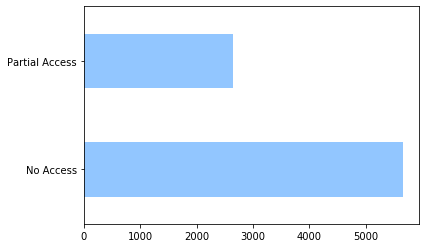

In [ ]:
drive_data_QUEENS = data_QUEENS[data_QUEENS['Complaint Type']=='Blocked Driveway']
drive_data_QUEENS['Descriptor'].value_counts().plot.barh()

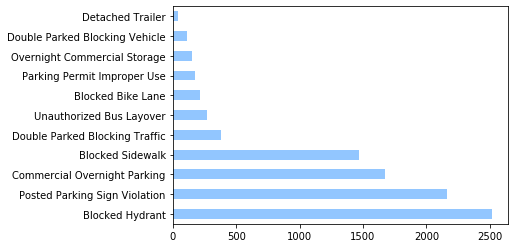

In [ ]:
parking_data_QUEENS = data_QUEENS[data_QUEENS['Complaint Type']=='Illegal Parking']
parking_data_QUEENS['Descriptor'].value_counts().plot.barh()

,Days to Close a Complaint,count of closed complaint,Rank
Agency,,,
DOHMH,82.42,2070,1
TLC,79.51,851,2
DPR,62.10,5311,3
DOE,60.29,56,4
EDC,43.51,41,5
DCA,27.94,584,6
DOB,23.98,5419,7
DOITT,18.86,7,8
DOT,14.44,12391,9


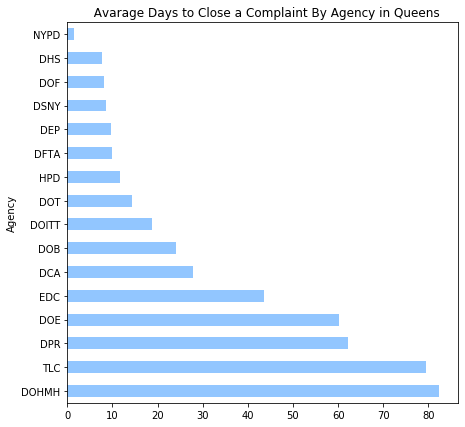

In [97]:

data_QUEENS_agg = data_QUEENS.groupby(['Agency'] ).agg({'Days to Close a Complaint':   'mean'  } ).round(2)
data_QUEENS_agg.reset_index()
data_QUEENS_agg['count of closed complaint'] = data_QUEENS.groupby('Agency' )['Days to Close a Complaint'].count()
data_QUEENS_agg = data_QUEENS_agg.sort_values(by = "Days to Close a Complaint" , ascending = False)
data_QUEENS_agg['Rank'] = data_QUEENS_agg['Days to Close a Complaint'].rank(ascending = False).astype(int)
data_QUEENS_agg['Days to Close a Complaint' ].plot.barh(title = '  Avarage Days to Close a Complaint By Agency in Queens' ,figsize = (7,7))
data_QUEENS_agg

# Setting up the  heatmap using folium

In [98]:
# copying the df_311
heat_data = df_311.copy()
# subsetting the needed infromation for folium 
heat_data= heat_data[[ 'Borough', "Longitude" , "Latitude"]]

# checking for NaN
heat_data.isna().sum()


Borough          0
Longitude    19023
Latitude     19023
dtype: int64

In [100]:
#dropping messing values
heat_data.dropna(subset=['Latitude'], how='all', inplace=True)
heat_data.isna().sum()

Borough      0
Longitude    0
Latitude     0
dtype: int64

In [101]:
# subsetting the geo location for each Borough to add it as layer in folium
heat_data_BROOKLYN = heat_data[heat_data['Borough']=='BROOKLYN']
heat_data_QUEENS = heat_data[heat_data['Borough']=='QUEENS']
heat_data_MANHATTAN = heat_data[heat_data['Borough']=='MANHATTAN']
heat_data_BRONX =heat_data[heat_data['Borough']=='BRONX']
heat_data_STATEN_ISLAN = heat_data[heat_data['Borough']=='STATEN ISLAND']

In [105]:
###https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-analysis
#https://python-visualization.github.io/folium/modules.html#folium.map.Icon
#https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/FeatureGroup.ipynb
#https://github.com/bobhaffner/medium_posts/blob/master/folium_markerclusters/folium_markerclusters.ipynb
#https://medium.com/@wesleywatanabe/using-python-matplotlib-pandas-and-folium-to-data-analysis-79299493c3e4
#https://towardsdatascience.com/solving-a-data-science-challenge-the-visual-way-355cfabcb1c5




#Creating an empty map with the recommnded listing geo information
#https://www.zillow.com/homedetails/13240-Sanford-Ave-APT-3H-Flushing-NY-11355/2082496375_zpid/
m = folium.Map(
    location=[40.7623706,-73.8474097],tiles='Stamen Terrain',
    zoom_start=14,
    control_scale=True
)

# taking the geo location and adding it in a list
coordinates_1 =[]
for la,lo in zip( heat_data_BROOKLYN['Latitude'],heat_data_BROOKLYN['Longitude']):
    coordinates_1.append([la,lo])
    
coordinates_2 =[]
for la,lo in zip(heat_data_QUEENS['Latitude'],heat_data_QUEENS['Longitude']):
    coordinates_2.append([la,lo])
    
coordinates_3 =[]

for la,lo in zip( heat_data_MANHATTAN['Latitude'],heat_data_MANHATTAN['Longitude']):
    coordinates_3.append([la,lo])
    
coordinates_4 =[]
for la,lo in zip(heat_data_BRONX['Latitude'],heat_data_BRONX['Longitude']):
    coordinates_4.append([la,lo])

coordinates_5 =[]
for la,lo in zip(heat_data_STATEN_ISLAN['Latitude'],heat_data_STATEN_ISLAN['Longitude']):
    coordinates_5.append([la,lo])
    
#adding a gradient bar
#https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Colormaps.ipynb
#branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map/47941032#47941032
steps=20
colormap = branca.colormap.linear.YlOrRd_07.scale(0, 1).to_step(steps)
#adding a title to the color bar
colormap.caption = 'The more red it, is the more complaints there are'
gradient_map=defaultdict(dict)
for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
colormap.add_to(m) #add color bar at the top of the map



# mapping the each heatmap and addding it to layers then adding it to the map
m.add_child(plugins.HeatMap(coordinates_1,gradient=gradient_map,  max_zoom=17, radius=10, blur=15, overlay = True , name = "BROOKLYN"))
m.add_child(plugins.HeatMap(coordinates_2,gradient=gradient_map,  max_zoom=17, radius=10, blur=15, overlay = True , name = "QUEENS"))
m.add_child(plugins.HeatMap(coordinates_3,gradient=gradient_map,  max_zoom=17, radius=10, blur=15, overlay = True , name = "MANHATTAN"))
m.add_child(plugins.HeatMap(coordinates_4,gradient=gradient_map,  max_zoom=17, radius=10, blur=15, overlay = True , name = "BRONX"))
m.add_child(plugins.HeatMap(coordinates_5,gradient=gradient_map,  max_zoom=17, radius=10, blur=15, overlay = True , name = "STATEN ISLAND"))



feature_group_Non_public = FeatureGroup( name='Elementary School - Non-public')
#Elementary School - Non-public
df_Elementary_School_Non_public =  df_schools[df_schools['factype']=='Elementary School - Non-public']

#Elementary School - Public
feature_group_public = FeatureGroup(name='Elementary School - Public')

df_Elementary_School_public = df_schools[df_schools['factype']=='Elementary School - Public']


for row in df_Elementary_School_public.itertuples():
       folium.Marker(location=[row.latitude,row.longitude], popup=row.facname ,icon=folium.Icon(color='red',icon='university', prefix='fa') ,
          overlay = False).add_to(feature_group_public)

for row in df_Elementary_School_Non_public.itertuples():
       folium.Marker(location=[row.latitude,row.longitude], popup=row.facname , icon=folium.Icon(color='darkred',icon='university', prefix='fa') ,
          overlay = False).add_to(feature_group_Non_public)

# making the Hospital layer
feature_group_Hospital = FeatureGroup( name='Hospitals')




#making the parks layer - Public
feature_group_parks = FeatureGroup(name='Parks')





# taking the geo location of the hospitals and adding it to the layer
for row in df_hospitals.itertuples():
       folium.Marker(location=[row.latitude,row.longitude], popup=row.facname ,icon=folium.Icon(color='white',icon='plus', prefix='fa' , icon_color = "red"),
          overlay = False).add_to(feature_group_Hospital)
        
# taking the geo location for parks and adding it to the layer
for row in df_parks.itertuples():
       folium.Marker(location=[row.latitude,row.longitude], popup=row.facname , icon=folium.Icon(color='green',icon='tree', prefix='fa') ,
          overlay = False).add_to(feature_group_parks)



# defing the floating img
dr_tao = ('https://www.fairfield.edu/media/fairfielduniversitywebsite/images/newsletter/dsb/Tao_resized175.jpg')
#adding a floating img in the map                    
FloatImage(dr_tao,bottom=5,left=5).add_to(m)

# adding the the listting to the map
#https://www.zillow.com/homedetails/13240-Sanford-Ave-APT-3H-Flushing-NY-11355/2082496375_zpid/
folium.CircleMarker([40.755098,-73.8327343],
                    radius=30,
                    popup=' Your Future Home : 13240 Sanford Ave APT 3H, Flushing, NY 11355 ',
                    color='black', fill_color='white' ,
                    ).add_to(m)

folium.Marker([40.755098,-73.8327343],
              popup='Your Future Home : 13240 Sanford Ave APT 3H, Flushing, NY 11355',
              icon=folium.Icon(color="gray", icon= "home")
             ).add_to(m)

# adding MeasureControl to the map
m.add_child(MeasureControl())

#adding  the layers (schools , park, hospital) to the map
feature_group_public.add_to(m)
feature_group_Non_public.add_to(m)
feature_group_parks.add_to(m)
feature_group_Hospital.add_to(m)

#adding diffrent styles to the map
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('stamentoner').add_to(m)


#adding a map title

title_html = '''
             <h3 align="center" style="font-size:20px"><b> The Map of New York City </b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))


#https://nbviewer.jupyter.org/github/bobhaffner/medium_posts/blob/master/folium_legend/folium_legend.ipynb 




#Adding a legend

#https://nbviewer.jupyter.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd


template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
  
     &nbsp; School &nbsp;  &nbsp;&nbsp;  &nbsp; <i class="fa fa-university fa-2x" style="color:gray"></i><br>
                              &nbsp; Hospitals &nbsp; &nbsp; <i class="fa fa-plus fa-2x" style="color:gray"></i><br>
                              &nbsp; Parks &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;   &nbsp; <i class="fa fa-tree fa-2x" style="color:gray"></i>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)








#adding the layer control to the map so the user can choose what infortmaion to display on the map
folium.LayerControl(collapsed=True).add_to(m)

m
#saving the map
m.save("Client_map.html")
    

# Taking a look at the heatmap of NYC:

### First looking at the heatmap from above
<br>
<img src="https://i.imgur.com/LTAqQvQ.png"
     alt="map 1"
     style="float: left; margin-right: 10px;" />
<br>

#### looks like there's no safe place in NYC!

<br>

#### lets zoom in and see our listing: 
<img src="https://i.imgur.com/jNJ3Pls.png"
     alt="map 2"
     style="float: left; margin-right: 10px;" />
<br>

#### this looks better, now lets zoom in more and see:
<br>
<img src="https://i.imgur.com/LcusPz4.png"
     alt="map 3"
     style="float: left; margin-right: 10px;" />
<br>



### we see that the listing that we picked for the client  is in a great location and there is lots of parks, schools and hospitals near it

# [Click here to see full map](https://nbviewer.jupyter.org/github/Farisalenezy/hello-world/blob/master/Client_map.html)

# Part 7 Conclusion :
#### comment about the listing (why its the best for the client and why this a good fit for him and things to consider)

### Word Cloud

<Figure size 2880x2160 with 0 Axes>

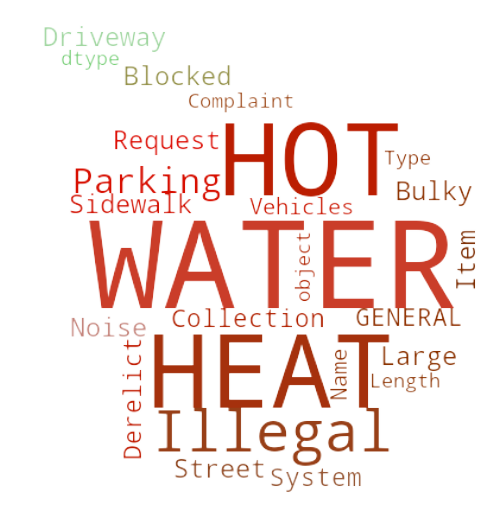

In [106]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Seource for the photo https://wikiclipart.com/apple-clipart_453/
mask = np.array(Image.open("apple-free-downloads-clipart-red.jpg"))
text = df_311['Complaint Type']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color= "rgba(255, 255, 255, 0)", mode="RGBA", mask = mask, 
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()